In [2]:
# Use ! to run a terminal command

# ! pip3 install wavio 
# ! pip3 install librosa
# ! pip3 install sounddevice

In [3]:
# Importing Necessary Modules
import sounddevice as sd
import soundfile as sf
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import librosa 
import librosa.display
import numpy as np
import IPython.display as ipd

In [4]:
# Defining Sampling Rate (Frequency) in Hz
sr = 44100

# Recording Duration in seconds
duration = 5 # 5 second duration

In [5]:
# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=2) # we will record with a mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("TEST.wav",sr,recording)

recording...............


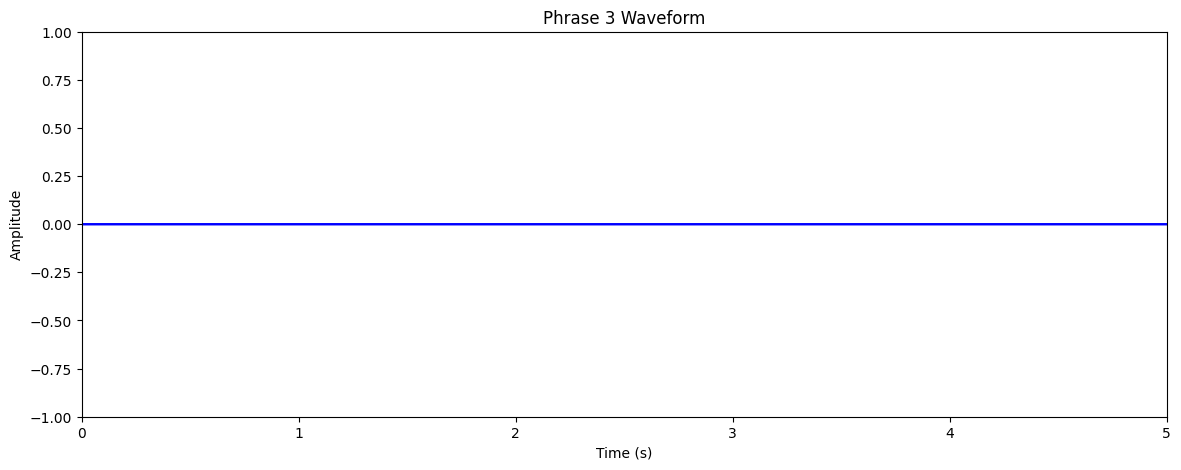

In [6]:
# Time axis for the waveform
time = librosa.samples_to_time(range(len(recording)), sr=sr)

time = np.linspace(0, duration, len(recording))

# Plotting the waveform
plt.figure(figsize=(14, 5))
plt.plot(time, recording, color='b')
plt.xlabel('Time (s)')
plt.xlim(0, duration)
plt.ylabel('Amplitude')
plt.ylim(-1, 1)
plt.title('Phrase 3 Waveform')
plt.show()

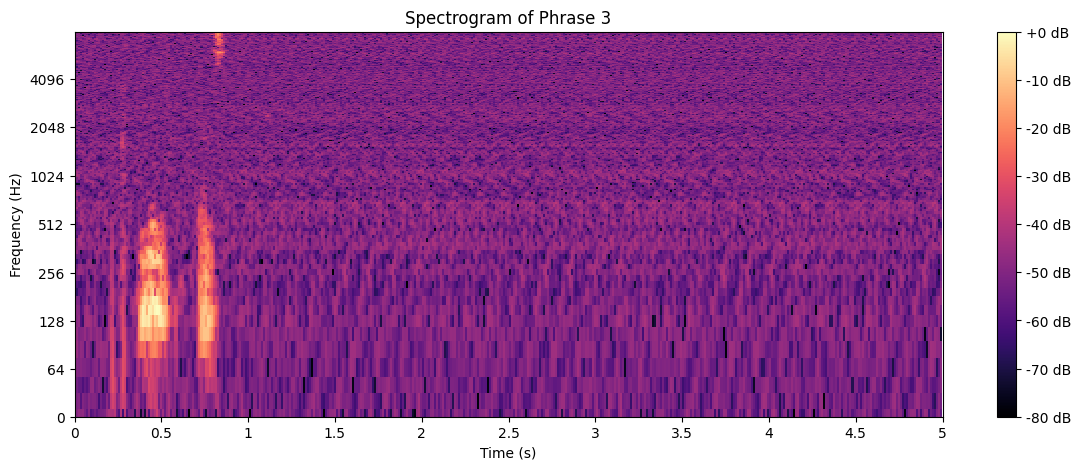

In [7]:
# Compute the spectrogram
freq = librosa.amplitude_to_db(np.abs(librosa.stft(recording[:, 0])), ref=np.max)

# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(freq, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Phrase 3')
plt.xlabel('Time (s)')
plt.xlim(0, 5)
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 8000)
plt.show()

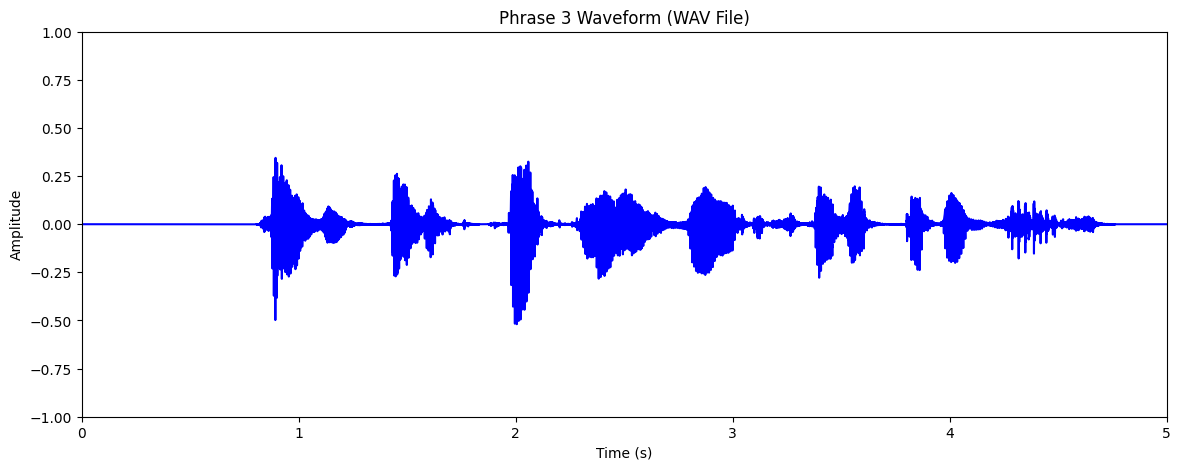

In [8]:
# Load the file
x, sr = librosa.load('phrase3.wav', sr=None)

# Time axis for the waveform
time = librosa.samples_to_time(range(len(x)), sr=sr)

time = np.linspace(0, duration, len(x))

# Plotting the waveform
plt.figure(figsize=(14, 5))
plt.plot(time, x, color='b')
plt.xlabel('Time (s)')
plt.xlim(0, duration)
plt.ylabel('Amplitude')
plt.ylim(-1, 1)
plt.title('Phrase 3 Waveform (WAV File)')
plt.show()

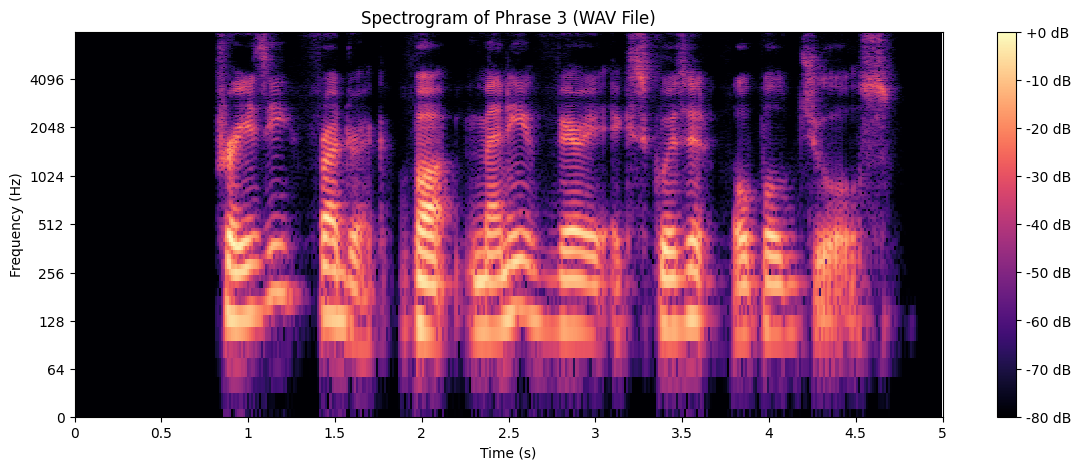

In [9]:
# Compute the spectrogram
freq_wav = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)

# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(freq_wav, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Phrase 3 (WAV File)')
plt.xlabel('Time (s)')
plt.xlim(0, 5)
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 8000)
plt.show()

In [10]:
stereo_signal, sr = librosa.load("phrase1.wav", sr=None, mono=False) # Loading recorded phrase

L = stereo_signal[0]
R = stereo_signal[1]

# Original
identical_columns = np.vstack((L, R)) # Two identical columns
original = f"teamJCLM-stereosoundfile-0ms.wav"
sf.write(original, identical_columns.T, sr)

# Delaying by avghead
avghead = 28
avghead_delay = np.roll(R, avghead)
avghead_file = f"teamJCLM-stereosoundfile-avghead.wav"
sf.write(avghead_file, np.vstack((L, avghead_delay)).T, sr)

# Delaying by 1ms, 10ms, and 100ms
for delay in [1, 10, 100]:
    samples = int((delay*sr)/1000)
    delay_column = np.roll(R, samples)
    delayed_file = f"teamJCLM-stereosoundfile-{delay}ms.wav"
    sf.write(delayed_file, np.vstack((L, delay_column)).T, sr)

In [11]:
no_delay_stereo, sr = librosa.load("teamJCLM-stereosoundfile-0ms.wav", sr=None, mono=False) # Loading original phrase
avghead_stereo, sr = librosa.load("teamJCLM-stereosoundfile-avghead.wav", sr=None, mono=False) # Loading avghead delayed phrase

# Attenuation for 0ms delayed audio
for attenuation in [-1.5, -3, -6]:
    attenuated_0ms = np.copy(no_delay_stereo) # Copy for new signal
    attenuated_0ms[1] = librosa.effects.preemphasis(no_delay_stereo[1], coef = 10**(attenuation/10))
    filename_0ms = f"teamJCLM-stereosoundfile-0ms-{attenuation}dB.wav"
    sf.write(filename_0ms, attenuated_0ms.T, sr)

# Attenuation for avghead delayed audio
for attenuation in [-1.5, -3, -6]:
    attenuated_avghead = np.copy(avghead_stereo)
    attenuated_avghead[1] = librosa.effects.preemphasis(avghead_stereo[1], coef = 10**(attenuation/10))
    filename_avg_head = f"teamJCLM-stereosoundfile-avghead-{attenuation}dB.wav"
    sf.write(filename_avg_head, attenuated_avghead.T, sr)